In [1]:
import sys
import os
cwd = os.path.dirname(os.getcwd())
sys.path.append(cwd)
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import analyst as al
import assistant as at
import messenger as ms
import datetime
import trader as tr
import random
import tensorflow as tf

C:\Users\Xiao\Miniconda3\envs\athena\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [235]:
code_list = ['603979']

In [236]:
t = ms.TickData()
for i in code_list:
    t.update(i)
p = al.PriceDeviation()
diff_list = p.show_difference_list(code='603979', duration=300)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||               87%timed out
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||               87%timed out
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||              88%timed out
timed out
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||       95%timed out
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  100%
|||||||||||||||||||||||                                                                               23%<urlopen error timed out>
|||||||||||||||||||||||||||||||||||                                                                   35%<urlopen error timed out>
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||                                70%<urlopen error timed out>
||||||||||||||||||||||||||||||

In [3]:
# p = al.PriceDeviation()

In [4]:
# diff_list = p.show_difference_list(code='000625', duration=300)

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  100%


In [237]:
df = pd.DataFrame(diff_list)

In [238]:
# 把DF分成若干等份
df_list = []
for i in range(0, len(diff_list)-3):
    df_list.append(df.loc[i: i+3, :])

In [239]:
# 计算特征得分
def get_score(df, col):
    score = len(df[df[col]>0]) / len(df)
    return score

In [240]:
# 提取特征函数
def get_features(df):
    dic = {}
    dic['emotion'] = get_score(df, 'smoothed difference')
    dic['cash'] = get_score(df, 'smoothed actual')
    dic['close'] = np.average(df['close'])
    dic['volume'] = np.max(df['volume'])
    return dic

In [241]:
# 构建特征DF
feature_list = []
for i in df_list:
    feature_list.append(get_features(i))
feature_df = pd.DataFrame(feature_list)

In [242]:
feature_df['close_shift'] = feature_df['close'].shift(-1)
feature_df = feature_df.reset_index()
feature_df = feature_df.loc[:len(feature_df)-2, :]
feature_df['up'] = (feature_df['close_shift']*0.999 >= feature_df['close']).astype(int)
# feature_df['up'] = feature_df['close_shift'] / feature_df['close']
feature_df

,index,cash,close,emotion,volume,close_shift,up
0,0,0.75,14.28550,1.00,2878600,14.37750,1
1,1,0.50,14.37750,1.00,2878600,14.40625,1
2,2,0.25,14.40625,1.00,2878600,14.41025,0
3,3,0.25,14.41025,1.00,2878600,14.36425,0
4,4,0.25,14.36425,1.00,2381300,14.38150,1
5,5,0.50,14.38150,1.00,3456500,14.44300,1
6,6,0.75,14.44300,1.00,3456500,14.55800,1
7,7,1.00,14.55800,1.00,3456500,14.62125,1
8,8,0.75,14.62125,1.00,3456500,14.64800,1
9,9,0.75,14.64800,1.00,3102000,14.57325,0


In [243]:
# LinearRegression Model
from sklearn import linear_model
# clf = linear_model.LogisticRegression()
clf = linear_model.LogisticRegression()
x_col = ['cash', 'emotion']
y_col = 'up'
x_train = feature_df.loc[:200, x_col]
y_train = feature_df.loc[:200, y_col]
x_test = feature_df.loc[200:, x_col]
y_test = feature_df.loc[200:, y_col]
clf.fit(x_train, y_train)
print('training score: %s'%clf.score(x_train, y_train))
print('testing score: %s'%clf.score(x_test, y_test))
print(clf.predict(x_test))

training score: 0.65671641791
testing score: 0.770833333333
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1]


In [244]:
# SVM Model
from sklearn import svm
clf = svm.SVR()
x_col = ['cash', 'emotion']
y_col = 'up'
x_train = feature_df.loc[:60, x_col]
y_train = feature_df.loc[:60, y_col]
x_test = feature_df.loc[60:, x_col]
y_test = feature_df.loc[60:, y_col]
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.14060680194854591

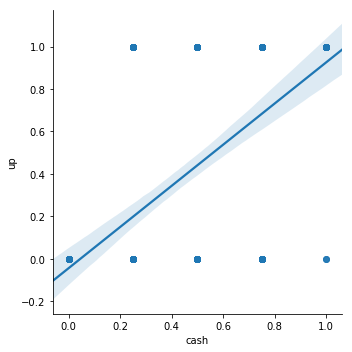

In [245]:
sns.lmplot(data=feature_df, x='cash', y='up')
plt.show()

In [246]:
feature_df['up'].value_counts()

0    168
1    128
Name: up, dtype: int64

In [247]:
128/(168+128)

0.43243243243243246